Original Audio:


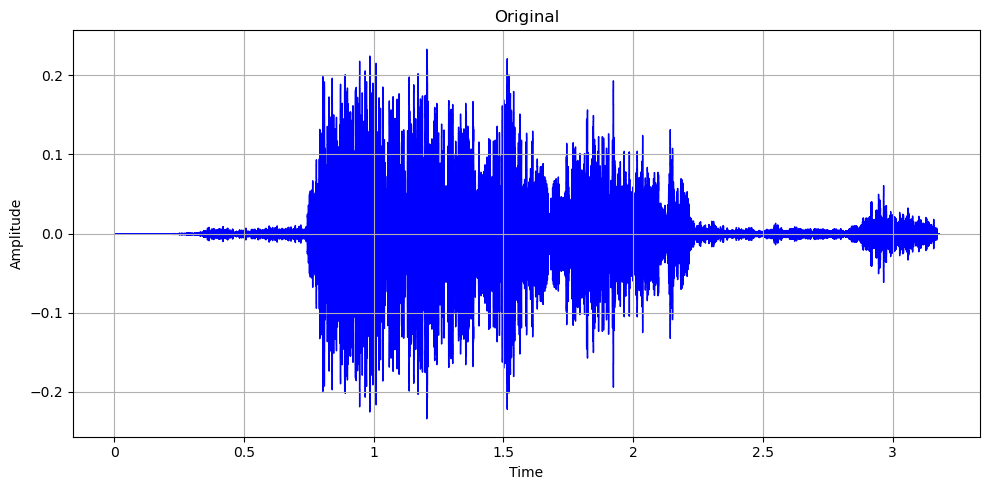

Trimmed Audio:


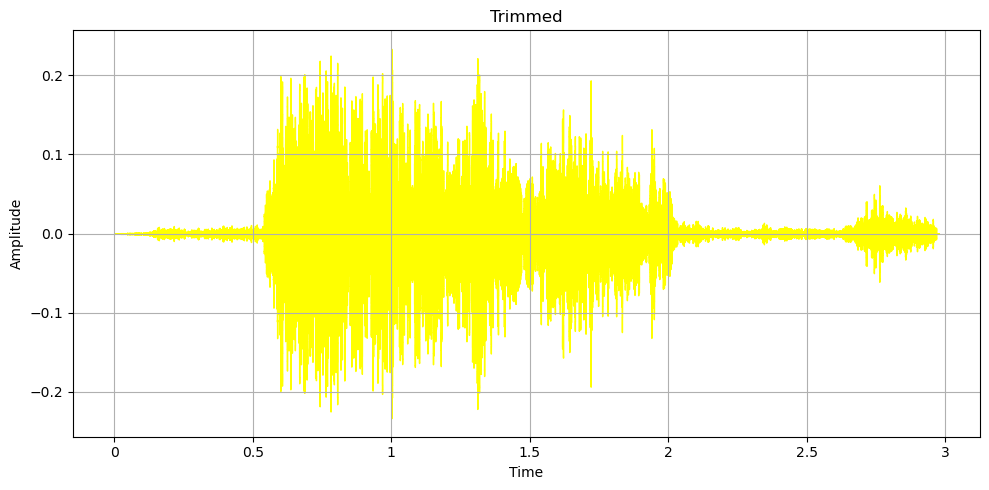

In [8]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

original_waveform, sample_rate_original = librosa.load('abhishek.wav', sr=None)
trimmed_waveform, index = librosa.effects.trim(original_waveform)
sf.write('trimmed_audio.wav', trimmed_waveform, sample_rate_original)
trimmed_audio, sample_rate_trimmed = librosa.load('trimmed_audio.wav', sr=None)

print("Original Audio:")
ipd.display(ipd.Audio(original_waveform, rate=sample_rate_original))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_waveform, sr=sample_rate_original, color='blue')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_waveform, rate=sample_rate_original))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed_audio, sr=sample_rate_trimmed, color='yellow')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Splitting with silence_threshold_db=1


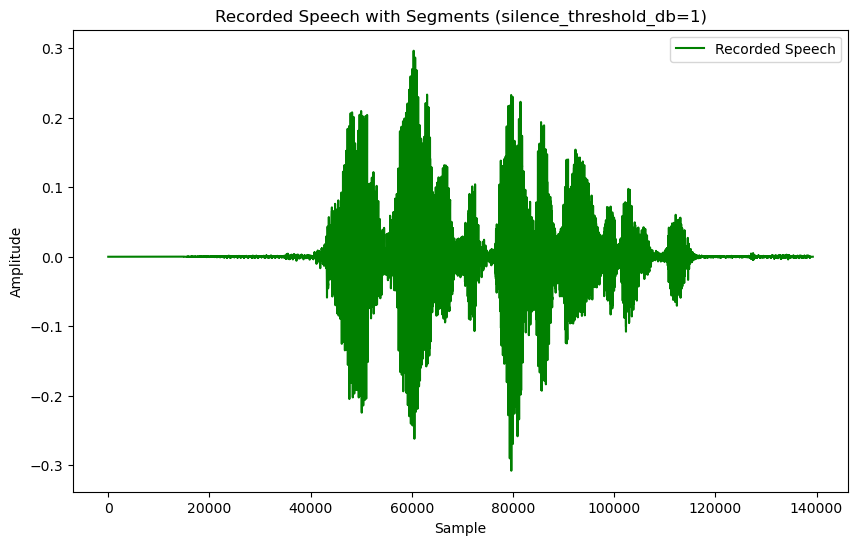

Splitting with silence_threshold_db=10


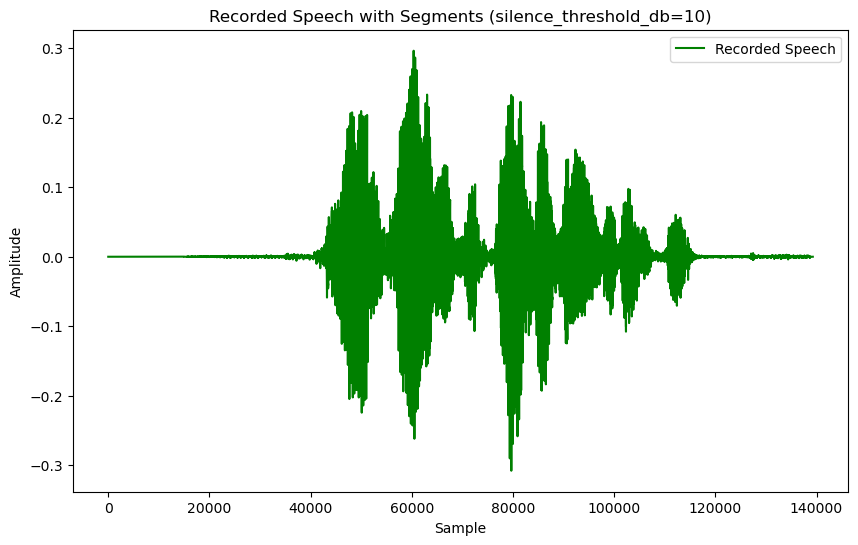

Splitting with silence_threshold_db=20


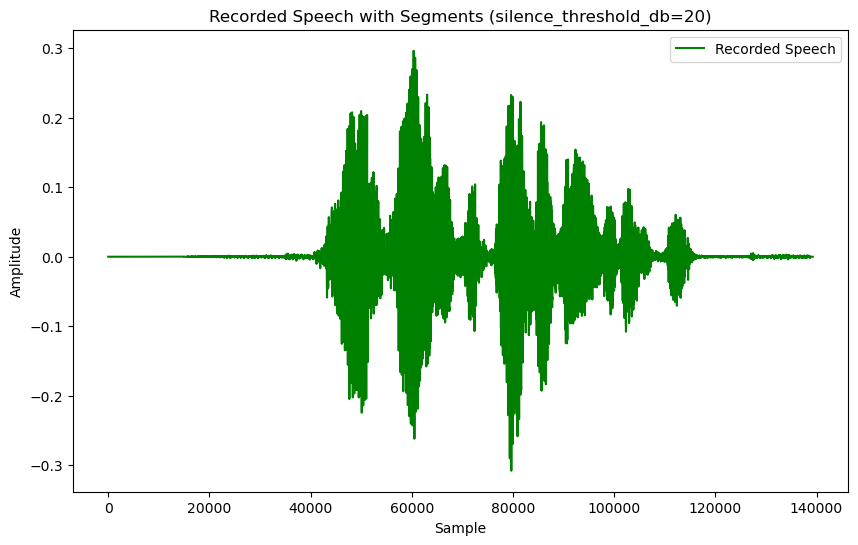

Splitting with silence_threshold_db=40


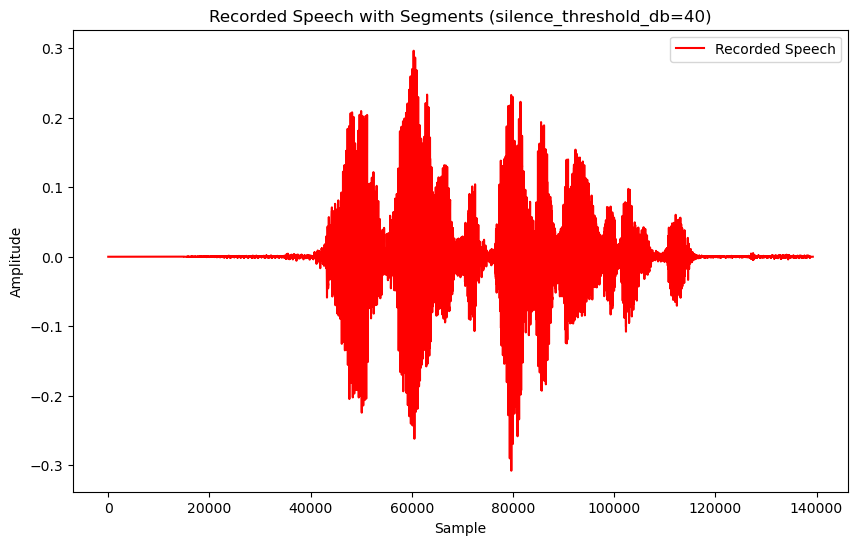

Listening to segments with silence_threshold_db=1:


Listening to segments with silence_threshold_db=10:


Listening to segments with silence_threshold_db=20:


Listening to segments with silence_threshold_db=40:


In [10]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import random

speech_waveform, sample_rate = librosa.load('Statement.wav', sr=None)

def split_and_save(silence_threshold_db):
    speech_segments = librosa.effects.split(speech_waveform, top_db=silence_threshold_db)
    color_options = ['purple', 'red', 'green', 'yellow']
    plt.figure(figsize=(10, 6))
    plt.plot(speech_waveform, color=random.choice(color_options), label='Recorded Speech')

    for i, segment in enumerate(speech_segments):
        start, end = segment
        segment_waveform = speech_waveform[start:end]
        sf.write(f'segment_{i}.wav', segment_waveform, sample_rate)

    plt.title(f"Recorded Speech with Segments (silence_threshold_db={silence_threshold_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

silence_thresholds = [1, 10, 20, 40]

for silence_threshold_db in silence_thresholds:
    print(f"Splitting with silence_threshold_db={silence_threshold_db}")
    split_and_save(silence_threshold_db)

for silence_threshold_db in silence_thresholds:
    print(f"Listening to segments with silence_threshold_db={silence_threshold_db}:")
    speech_segments = librosa.effects.split(speech_waveform, top_db=silence_threshold_db)
    for j in range(len(speech_segments)):
        ipd.display(ipd.Audio(f'segment_{j}.wav'))


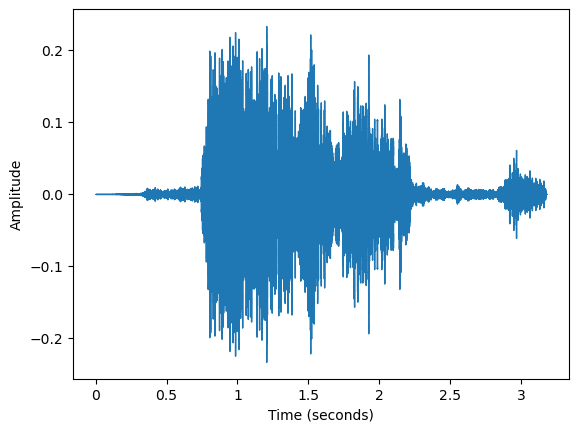

(1025, 150)
80.0


In [14]:
from librosa import display
import numpy as np

audio_waveform, sample_rate = librosa.load("abhishek.wav", sr=None)

plt.figure()
librosa.display.waveshow(y=audio_waveform, sr=sample_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

n_fft = 2048
stft_matrix = librosa.stft(audio_waveform, n_fft=n_fft, hop_length=n_fft//2)
print(stft_matrix.shape)

db_spectrum = librosa.amplitude_to_db(np.abs(stft_matrix), ref=np.max)
print(np.max(np.abs(db_spectrum)))


In [15]:
no_mute = librosa.effects.split(audio_waveform)
no_mute

array([[  9728, 152576]])

In [19]:
def displayTime(startFrame, endFrame):    
    print('start time: ' + str(startFrame/sample_rate ) + ', end time: ' + str(endFrame/sample_rate ))
for i in no_mute:
    displayTime(i[0],i[1])

start time: 0.20266666666666666, end time: 3.1786666666666665


 start time: 0.023219954648526078, end time: 2.9024943310657596


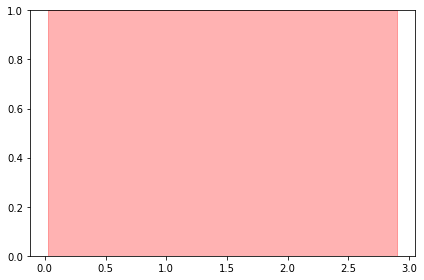

In [17]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)  
    if i % 2 == 0:
        plt.axvspan(start/sample_rate, end/sample_rate, color='red', alpha=0.3)  
    else:
        plt.axvspan(start/sample_rate, end/sample_rate, color='orange', alpha=0.3)  

plt.tight_layout()
plt.show()


C:\Users\buset\AppData\Local\Temp\ipykernel_14720\1758756933.py:6: RuntimeWarning: divide by zero encountered in log10
  waveform_db = 20 * np.log10(np.abs(audio_waveform) / max_amplitude)


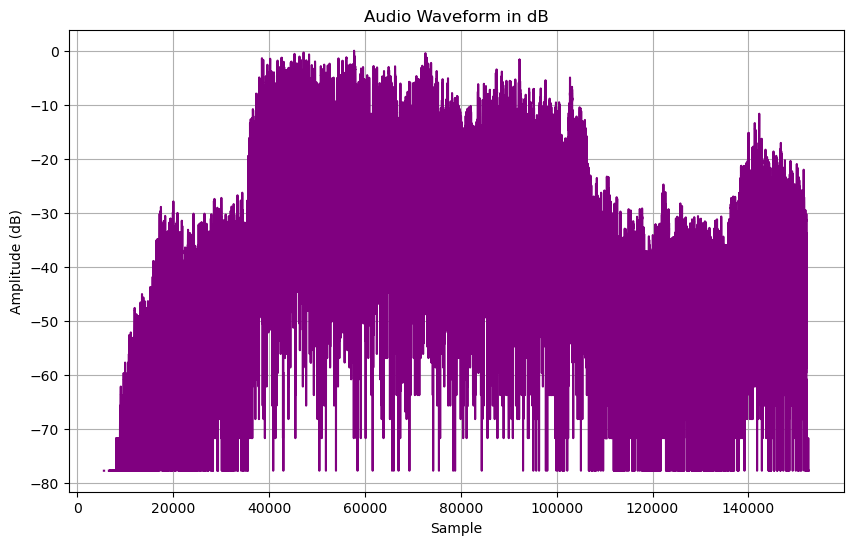

In [21]:
import numpy as np
import matplotlib.pyplot as plt

max_amplitude = np.max(np.abs(audio_waveform))

waveform_db = 20 * np.log10(np.abs(audio_waveform) / max_amplitude)

plt.figure(figsize=(10, 6))
plt.plot(waveform_db, color='purple')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Waveform in dB')
plt.grid(True)
plt.show()
